In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip /content/gdrive/MyDrive/'Colab Notebooks'/eye_gender_data.zip







Archive:  /content/gdrive/MyDrive/Colab Notebooks/eye_gender_data.zip
replace eye_gender_data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import eye_gender_data



In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard

# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import cv2
from PIL import Image
import pickle

print(tf.__version__)

2.5.0


In [ ]:
train_labels = pd.read_csv("eye_gender_data/Training_set.csv",usecols=["filename","label"])







In [ ]:
train_labels.label = train_labels.label.map({"male":1,"female":0}) 




In [ ]:
img_train_label = train_labels.label.values
img_train_label

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
for i in range(9220):
  path_read = "/content/eye_gender_data/train/Image_"+str(i+1)+".jpg"
  path_save = "/content/eye_gender_data/train_reshaped/Image_"+str(i+1)+".jpg"
  img = Image.open(path_read)
  img = img.resize((100,100))
  img.save(path_save)

In [ ]:
for i in range(2305):
  path_test_read = "/content/eye_gender_data/test/Image_"+str(i+1)+".jpg"
  path_test_save = "/content/eye_gender_data/test_reshaped/Image_"+str(i+1)+".jpg"
  img = Image.open(path_test_read)
  img = img.resize((100,100))
  img.save(path_test_save)

In [ ]:
img_train_data = np.zeros((9220,100,100,3),float)
for i in range(img_train_data.shape[0]):
  path = "/content/eye_gender_data/train_reshaped/Image_"+str(i+1)+".jpg"
  img_load = cv2.imread(path)
  count = i+1
  print(count)
  for j in range(img_train_data.shape[1]):
    for k in range(img_train_data.shape[2]):
      for m in range(img_train_data.shape[3]):
        # print(i,j,k,m)
        img_train_data[i][j][k][m] = img_load[j][k][m]

In [ ]:
model_file = "/content/gdrive/MyDrive/Colab Notebooks/data_set/train_imgs.pkl"

with open(model_file,'wb') as file1:
  pickle.dump(img_train_data,file1)

In [ ]:
lable_file = "/content/gdrive/MyDrive/Colab Notebooks/data_set/train_img_labels.pkl"

with open(lable_file,"wb") as file2:
  pickle.dump(img_train_label,file2)

In [ ]:
model_file = "/content/gdrive/MyDrive/Colab Notebooks/data_set/train_imgs.pkl"
lable_file = "/content/gdrive/MyDrive/Colab Notebooks/data_set/train_img_labels.pkl"

with open(model_file,'rb') as file3:
  x_train = pickle.load(file3)
with open(lable_file,'rb') as file4:
  y_train = pickle.load(file4)

In [ ]:
print(x_train.shape,y_train.shape)

(9220, 100, 100, 3) (9220,)


In [ ]:
img_test_data = np.zeros((2305,100,100,3),float)
for i in range(img_test_data.shape[0]):
  path = "/content/eye_gender_data/test_reshaped/Image_"+str(i+1)+".jpg"
  img_load = cv2.imread(path)
  count = i+1
  print(count)
  for j in range(img_test_data.shape[1]):
    for k in range(img_test_data.shape[2]):
      for m in range(img_test_data.shape[3]):
        # print(i,j,k,m)
        img_test_data[i][j][k][m] = img_load[j][k][m]

In [ ]:
test_file = "/content/gdrive/MyDrive/Colab Notebooks/data_set/test_img.pkl"

with open(test_file,'wb') as file5:
  pickle.dump(img_test_data,file5)

In [ ]:
test_file = "/content/gdrive/MyDrive/Colab Notebooks/data_set/test_img.pkl"

with open(test_file,'rb') as file6:
  x_test = pickle.load(file6)

(2305, 100, 100, 3)


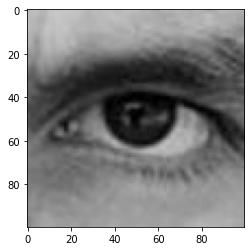

In [ ]:
print(x_test.shape)
plt.imshow(x_train[0]/255)



In [ ]:
model = Sequential([
                    # first conv and max pool layer
                   tf.keras.layers.Conv2D(filters=20,kernel_size=(4,4),strides=(1,1),activation="relu",padding='same',input_shape=(100,100,3)),
                   tf.keras.layers.MaxPool2D(pool_size= (2,2)),
                    # second conv and max pool layer
                   tf.keras.layers.Conv2D(filters=25,kernel_size=(4,4),strides=(1,1),activation="relu",padding='same',input_shape=(100,100,3)),
                   tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                   #third cov and max pool layer
                   tf.keras.layers.Conv2D(filters=30,kernel_size=(4,4),strides=(1,1),activation="relu",padding='same',input_shape=(100,100,3)),
                   tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                   # fully connected layer 
                   Flatten(),
                   Dense(512,activation='relu'),
                   Dense(256,activation='relu'),
                   Dense(128,activation='relu'),
                   Dense(64,activation='relu'),
                   Dense(32,activation='relu'),
                   Dense(16,activation='relu'),
                   Dense(8,activation='relu'),
                   Dense(4,activation='relu'),
                   Dense(2,activation='relu'),
                   # output layer 
                   Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 20)      980       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 25)        8025      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 25)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 30)        12030     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4320)              0

In [ ]:
# compiling the model or adding back prop
model.compile(optimizer='adam',
loss= tf.keras.losses.BinaryCrossentropy(),
metrics=['accuracy'])

# tunining hyperparam
EPOCHS = 100
x_train_normalized = x_train / 255.
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,
restore_best_weights=True,
verbose=1)



# trainig the model
history = model.fit(x_train_normalized, y_train,
batch_size=25,
callbacks=[es_callback],
validation_split=0.5, epochs=EPOCHS,
verbose=1)

Epoch 1/100
185/185 [==============================] - 4s 19ms/step - loss: 0.2481 - accuracy: 0.9278 - val_loss: 0.2839 - val_accuracy: 0.9093
Epoch 2/100
185/185 [==============================] - 3s 15ms/step - loss: 0.2191 - accuracy: 0.9384 - val_loss: 0.2933 - val_accuracy: 0.9085
Epoch 3/100
185/185 [==============================] - 3s 15ms/step - loss: 0.2071 - accuracy: 0.9382 - val_loss: 0.3450 - val_accuracy: 0.8846
Restoring model weights from the end of the best epoch.
Epoch 00003: early stopping


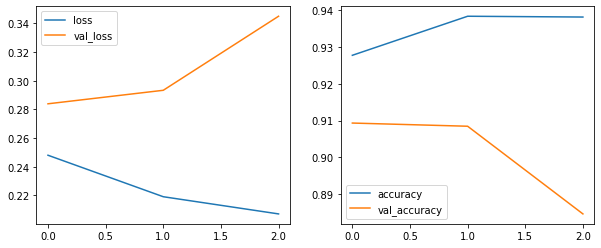

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

In [ ]:
x_test_normalized = x_test / 255.
predictions = model.predict(x_test_normalized)
predictions[:100]

array([[0.9969716 ],
       [0.7251794 ],
       [0.97123015],
       [0.46784878],
       [0.99816126],
       [0.990211  ],
       [0.46242777],
       [0.75421625],
       [0.97607464],
       [0.46242777],
       [0.46242777],
       [0.48807243],
       [0.46242777],
       [0.9633822 ],
       [0.46242777],
       [0.46242777],
       [0.5085549 ],
       [0.46242777],
       [0.9883061 ],
       [0.46242777],
       [0.46242777],
       [0.75080013],
       [0.46242777],
       [0.46242777],
       [0.46242777],
       [0.46242777],
       [0.9772489 ],
       [0.46242777],
       [0.4747904 ],
       [0.7985286 ],
       [0.96221745],
       [0.6578435 ],
       [0.9859595 ],
       [0.46242777],
       [0.9967933 ],
       [0.46242777],
       [0.46242777],
       [0.46242777],
       [0.86408055],
       [0.46242777],
       [0.98665607],
       [0.95635605],
       [0.46242777],
       [0.46242777],
       [0.79123837],
       [0.9923758 ],
       [0.99451643],
       [0.462

In [ ]:
prediction_labels = []
for i in range(predictions.shape[0]):
  for j in range(predictions.shape[1]):
    if predictions[i][j] > 0.5:
      prediction_labels.append("male")
    else:
      prediction_labels.append("female")


In [ ]:
print(prediction_labels)


['male', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'female', 'female', 'male', 'female', 'male', 'female', 'female', 'male', 'female', 'female', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'female', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'female', 'ma

In [ ]:
final_prediction = pd.DataFrame({"label":prediction_labels})
final_prediction.head()

,label
0,male
1,male
2,male
3,female
4,male


In [ ]:
from google.colab import files
final_prediction.to_csv('prediction.csv',index= False)
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>